<center>
    <font size="5" color="steelblue"><b>Universidad Nacional de Colombia</b></font><br>
    <font size="5" color="steelblue"><b>Unidad de Informática - Facultad de Ciencias Económicas</b></font><br>
    <font size="5" color="steelblue"><b>Curso Libre Machine Learning con Python | 2023-1</b></font><br>
    <font size="5" color="steelblue"><b>Semana 3: Algoritmos de Aprendizaje Supervisado</b></font><br>
    <font size="5" color="steelblue"><b>Estudiante Auxiliar: Jaime Andrés Fierro Aponte</b></font><br>
</center>

# Dependencias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Machine Learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc


In [2]:
#Función para generar la función de predicción de un clasificador entrenado previamente.
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

# Función para visualizar la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun, ax=None):
    min_x, max_x = np.min(X[:, 0]), np.max(X[:, 0])
    min_y, max_y = np.min(X[:, 1]), np.max(X[:, 1])

    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)

    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape

    ZZ = np.zeros((grid_r, grid_c))

    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])

    ax.contourf(XX, YY, ZZ, 100, cmap = plt.cm.coolwarm_r, vmin= -1, vmax=2, alpha = 0.75)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


# Función para visualizar un conjunto de datos de dos variables en un plano 2D
def plot_data(X, y, dpi=110, model=None, ax=None, title=None):

    if ax is None:
      _, ax = plt.subplots(dpi = dpi)

    if model is not None:
      pred_fun = gen_pred_fun(model)
      plot_decision_region(X, pred_fun, ax)

    y_unique = np.unique(y)
    df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'Clases': y})
    sns.set_theme()
    sns.scatterplot(data=df, x='x1', y='x2',
                    hue='Clases', style='Clases',
                    ax=ax, palette='Set1')\
       .set_title(title)


# Función para graficar el área bajo la curva ROC
def auc_roc(y_true, y_predicted):

  plt.figure(figsize=(5, 5))

  tpr,fpr,_ = roc_curve(y_true, y_predicted)
  roc_auc = 1 - auc(fpr, tpr)
  plt.plot(tpr, fpr, color='darkorange', lw=2,
          label='Curva ROC (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('% Falso Positivo')
  plt.ylabel('% Verdadero Positivo')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')



# Datos perfectamente diferenciables

Tipo de objeto de las características: <class 'numpy.ndarray'>
Tipo de objeto de las etiquetas: <class 'numpy.ndarray'>

Dimensiones de las características: (500, 2)
Dimensiones de las etiquetas: (500,)

Primeras 5 muestras:
 [[-0.3231293   8.97061347]
 [ 2.01552971  0.99391405]
 [ 3.13319543  1.766638  ]
 [ 0.19350487  9.48368957]
 [-0.16318956  8.73277501]]

Primeras 5 etiquetas: [0 1 1 0 0]


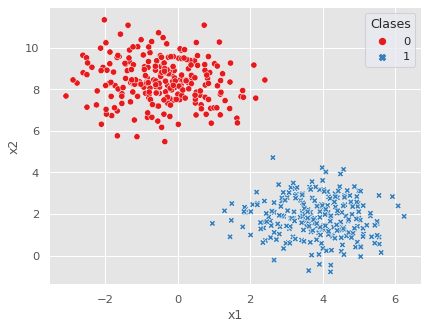

In [ ]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=500,
                           centers=2,
                           random_state=246)

print(f'Tipo de objeto de las características: {type(X_blobs)}')
print(f'Tipo de objeto de las etiquetas: {type(y_blobs)}')

print(f'\nDimensiones de las características: {X_blobs.shape}')
print(f'Dimensiones de las etiquetas: {y_blobs.shape}')

print('\nPrimeras 5 muestras:\n', X_blobs[:5, :])
print('\nPrimeras 5 etiquetas:', y_blobs[:5])

plot_data(X_blobs, y_blobs, dpi=75)

## Modelo

In [ ]:
# Partición de los datos
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_blobs, y_blobs,
                                                            train_size=0.7,
                                                            random_state=42)

In [ ]:
# Crear la instancia
logit_classifier = LogisticRegression()
# Entrenar el modelo
logit_classifier.fit(X_train_b, y_train_b)

LogisticRegression()

In [ ]:
# Intercepto
logit_classifier.intercept_

array([7.00230408])

In [ ]:
# Coeficientes
logit_classifier.coef_

array([[ 0.94385094, -1.71669699]])

In [ ]:
# Especificación del entrenamiento
logit_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

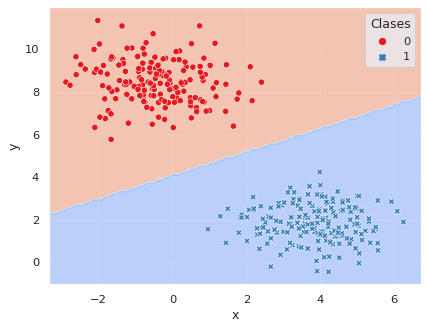

In [ ]:
# Gráfico de la clasificación
plot_data(X_train_b, y_train_b, dpi=75, model=logit_classifier)

In [ ]:
# Evaluación del modelo
y_pred_logit = logit_classifier.predict(X_test_b)
print(classification_report(y_test_b, y_pred_logit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        70

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Algoritmos de clasificación

## Datos con clases mezcladas

Tipo de objeto de las características: <class 'numpy.ndarray'>
Tipo de objeto de las etiquetas: <class 'numpy.ndarray'>

Dimensiones de las características: (1000, 2)
Dimensiones de las etiquetas: (1000,)

Primeras 5 muestras:
 [[ 0.28251055 -0.1034307 ]
 [ 0.98755435  1.14779157]
 [ 0.7817044   1.0192832 ]
 [ 0.21699431  1.25029596]
 [-0.89142232  1.34079675]]

Primeras 5 etiquetas: [1 0 0 0 0]


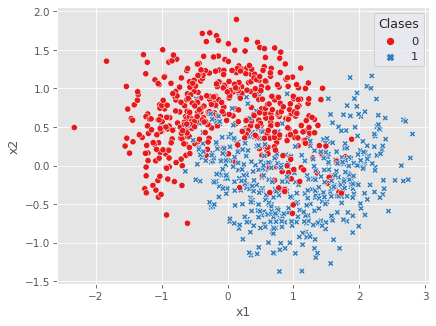

In [3]:
X_moons, y_moons = datasets.make_moons(n_samples=1000,
                                       noise=0.35,
                                       random_state=241)

print(f'Tipo de objeto de las características: {type(X_moons)}')
print(f'Tipo de objeto de las etiquetas: {type(y_moons)}')

print(f'\nDimensiones de las características: {X_moons.shape}')
print(f'Dimensiones de las etiquetas: {y_moons.shape}')

print('\nPrimeras 5 muestras:\n', X_moons[:5, :])
print('\nPrimeras 5 etiquetas:', y_moons[:5])

plot_data(X_moons, y_moons, dpi=75)

## Partición de los datos

In [4]:
# Partición de los datos
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    train_size=0.7,
                                                    random_state=42)

## Logit

### Entrenamiento

In [ ]:
# Crear la instancia
logit_classifier = LogisticRegression()
# Entrenar el modelo
logit_classifier.fit(X_train, y_train)

LogisticRegression()

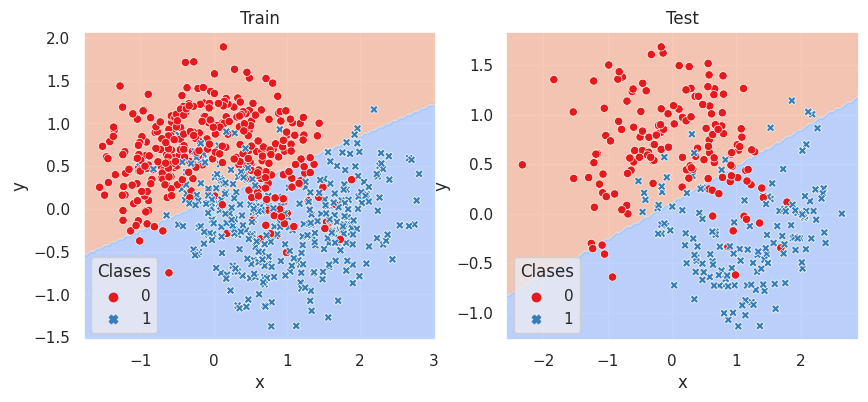

In [ ]:
# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=logit_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=logit_classifier, ax=ax2, title='Test')

### Evaluación

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_logit = logit_classifier.predict(X_test)

In [ ]:
# Matriz de confusión
confusion_matrix(y_test, y_pred_logit)

array([[127,  26],
       [ 20, 127]])

In [ ]:
# Matriz de confusión como dataframe
pd.DataFrame(confusion_matrix(y_test, y_pred_logit,),
              columns=['Positive_Pred', 'Negative_Pred'],
              index=['Positive_Real', 'Negative_Real'])

,Positive_Pred,Negative_Pred
Positive_Real,127,26
Negative_Real,20,127


In [ ]:
# Métricas clásicas de evaluación
acc = accuracy_score(y_test, y_pred_logit)
prec = precision_score(y_test, y_pred_logit, pos_label=0)
rec = recall_score(y_test, y_pred_logit, pos_label=0)
f1 = f1_score(y_test, y_pred_logit)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8467
Precision: 0.8639
Recall: 0.8301
F1-Score: 0.8467


In [ ]:
# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.83      0.86      0.85       147

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



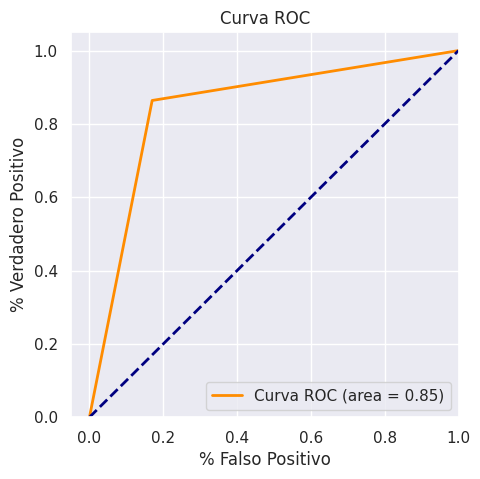

In [ ]:
# ROC-AUC
auc_roc(y_test, y_pred_logit)

## Naïve Bayes

### Entrenamiento

In [ ]:
# Crear la instancia
nb_classifier = GaussianNB()
# Entrenar el modelo
nb_classifier.fit(X_train, y_train)

GaussianNB()

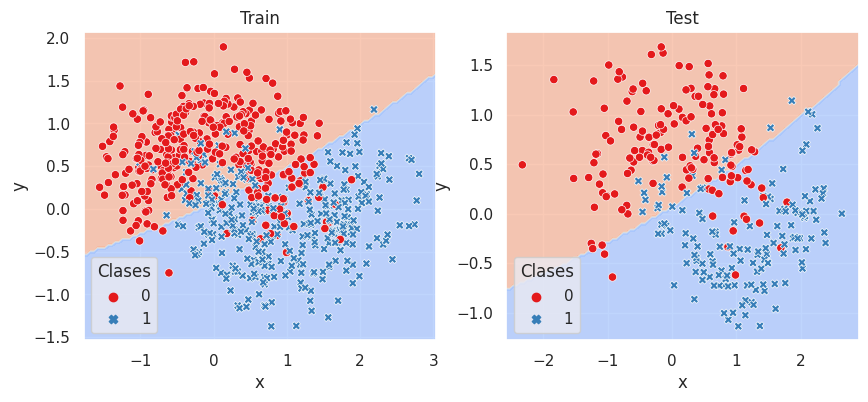

In [ ]:
# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=nb_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=nb_classifier, ax=ax2, title='Test')

### Evaluación

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
# Matriz de confusión como dataframe
pd.DataFrame(confusion_matrix(y_test, y_pred_nb,),
              columns=['Positive_Pred', 'Negative_Pred'],
              index=['Positive_Real', 'Negative_Real'])

,Positive_Pred,Negative_Pred
Positive_Real,129,24
Negative_Real,20,127


In [ ]:
# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       153
           1       0.84      0.86      0.85       147

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



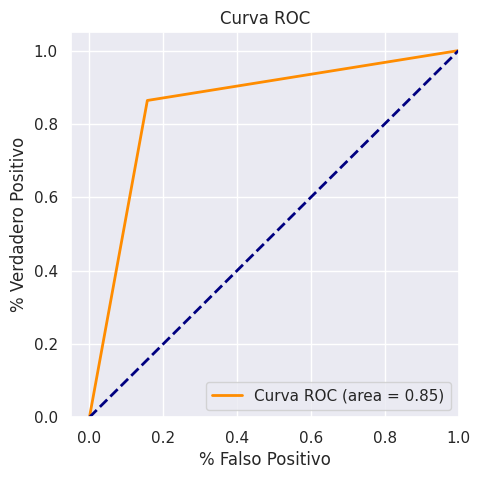

In [ ]:
# ROC-AUC
auc_roc(y_test, y_pred_nb)

## KNN

### Entrenamiento

In [ ]:
# Crear la instancia
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Entrenar el modelo
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

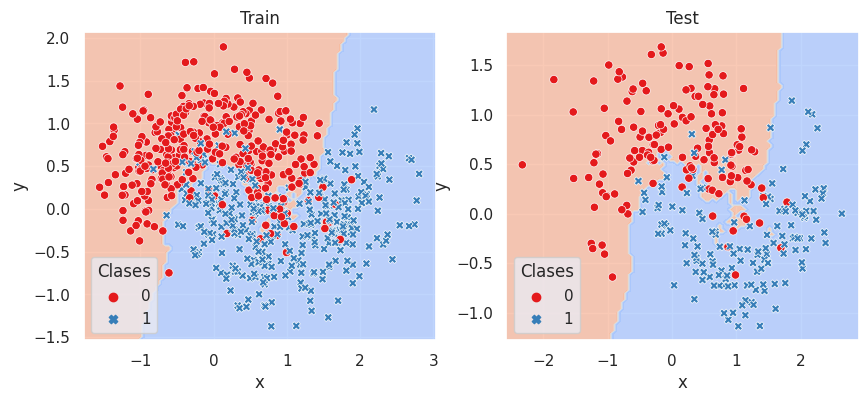

In [ ]:
# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=knn_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=knn_classifier, ax=ax2, title='Test')

### Evaluación

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       153
           1       0.88      0.95      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



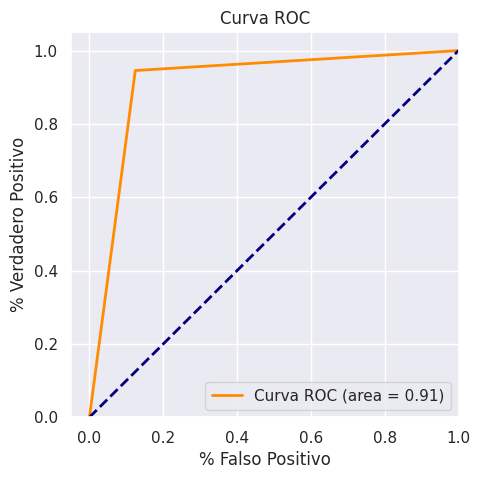

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_knn = knn_classifier.predict(X_test)

# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_knn))

# ROC-AUC
auc_roc(y_test, y_pred_knn)

### Ejercicio:

Entrene un KNN con 1 vecino y otro con 10 vecinos. Evalúe el desempeño de cada modelo ¿Hay un mejor desempeño entre más vecinos haya? ¿Entre menos vecinos? ¿Depende?

In [ ]:
# ------ ELIMINE ESTA LÍNEA Y ESCRIBA SU CÓDIGO AQUÍ ------

## Máquinas de Soporte Vectorial (SVM)

### Lineal

#### Entrenamiento

In [ ]:
# Crear la instancia
svm_lin_classifier = SVC(kernel='linear')
# Entrenar el modelo
svm_lin_classifier.fit(X_train, y_train)

SVC(kernel='linear')

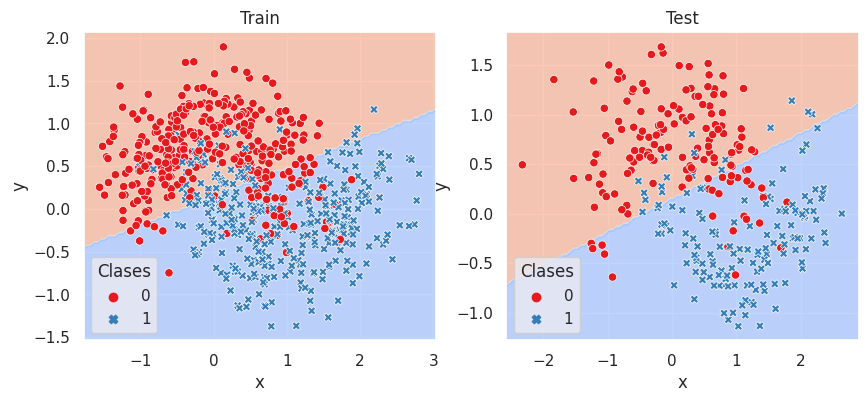

In [ ]:
# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=svm_lin_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=svm_lin_classifier, ax=ax2, title='Test')

#### Evaluación

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       153
           1       0.83      0.88      0.85       147

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



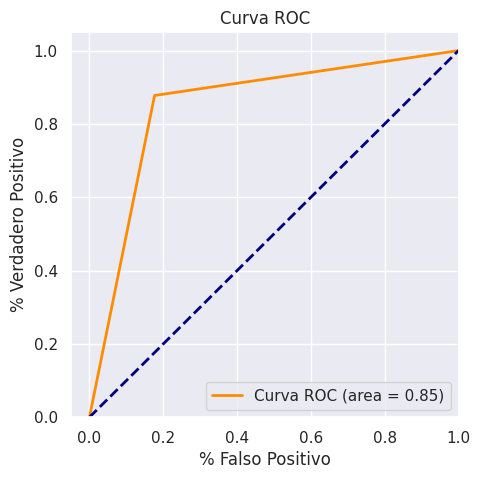

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_svm_lin = svm_lin_classifier.predict(X_test)

# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_svm_lin))

# ROC-AUC
auc_roc(y_test, y_pred_svm_lin)

### Radial Basis Function (RBF)

#### Entrenamiento

In [ ]:
# Crear la instancia
svm_rbf1_classifier = SVC(kernel='rbf', gamma=0.01, C=5)
# Entrenar el modelo
svm_rbf1_classifier.fit(X_train, y_train)

SVC(C=5, gamma=0.01)

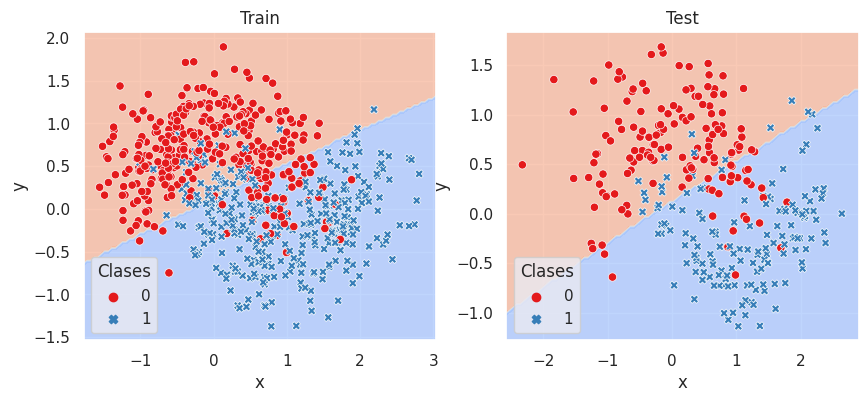

In [ ]:
# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=svm_rbf1_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=svm_rbf1_classifier, ax=ax2, title='Test')

#### Evaluación

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       153
           1       0.83      0.87      0.85       147

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



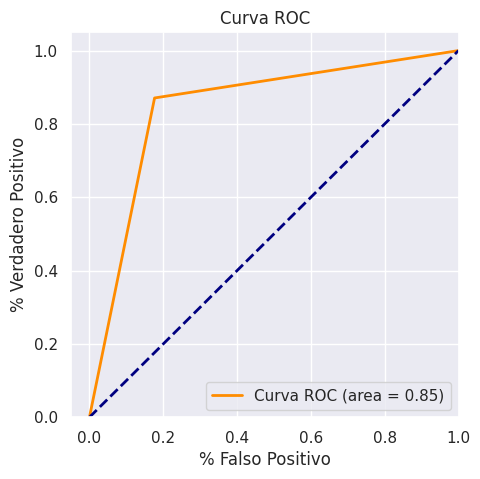

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_svm_rbf1 = svm_rbf1_classifier.predict(X_test)

# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_svm_rbf1))

# ROC-AUC
auc_roc(y_test, y_pred_svm_rbf1)

#### Ejercicio:

Entrene una SVM con un gamma alto (menor a 10) y un C bajo (entre 0.1 y 10) y otra con un gamma bajo (entre 0.01 y 3) y un C alto (entre 50 y 100). Evalúe el desempeño de cada modelo ¿Considera un gamma y un C altos conllevan a un mejor modelo? ¿Por qué?

In [ ]:
# ------ ELIMINE ESTA LÍNEA Y ESCRIBA SU CÓDIGO AQUÍ ------

### Poly

#### Entrenamiento

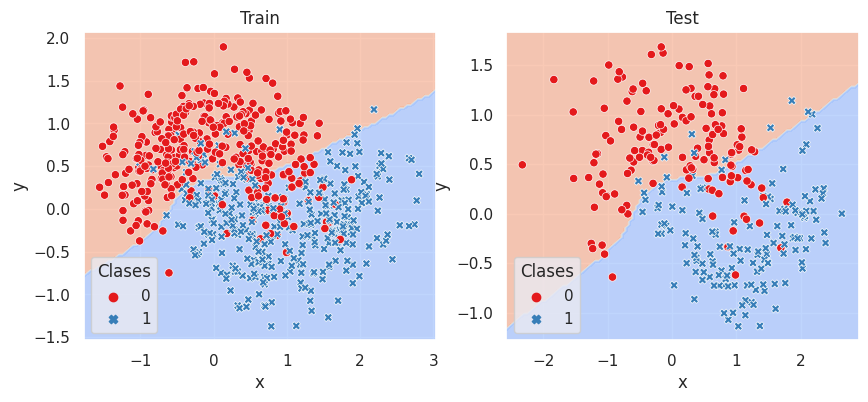

In [ ]:
# Crear la instancia
svm_poly1_classifier = SVC(kernel='poly', C=1.5, degree=3, gamma='scale')
# Entrenar el modelo
svm_poly1_classifier.fit(X_train, y_train)

# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=svm_poly1_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=svm_poly1_classifier, ax=ax2, title='Test')

#### Evaluación

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       153
           1       0.83      0.91      0.87       147

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



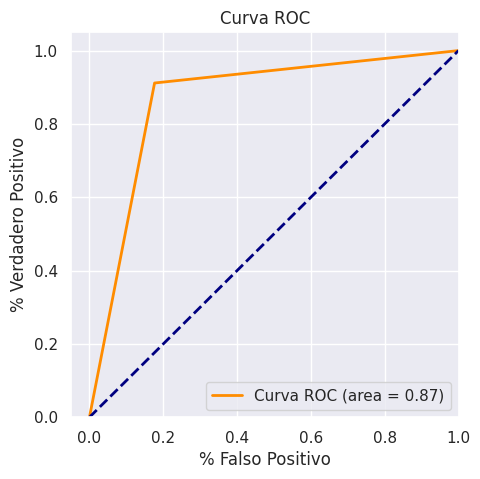

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_svm_poly1 = svm_poly1_classifier.predict(X_test)

# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_svm_poly1))

# ROC-AUC
auc_roc(y_test, y_pred_svm_poly1)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81       153
           1       0.76      0.97      0.85       147

    accuracy                           0.83       300
   macro avg       0.86      0.83      0.83       300
weighted avg       0.86      0.83      0.83       300



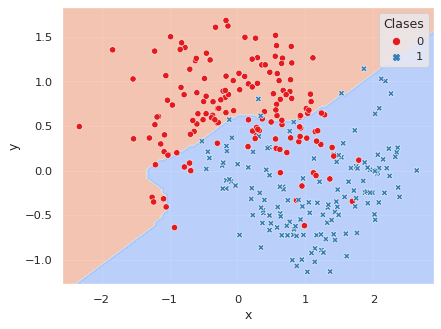

In [ ]:
# Crear la instancia
svm_classifier = SVC(kernel='poly', degree=5, gamma=1.5)
# Entrenar el modelo
svm_classifier.fit(X_train, y_train)

# Gráfico de la clasificación
plot_data(X_test, y_test, dpi=75, model=svm_classifier)

# Evaluación del modelo
y_pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred_svm))

## Árboles de Decisión

### Entrenamiento

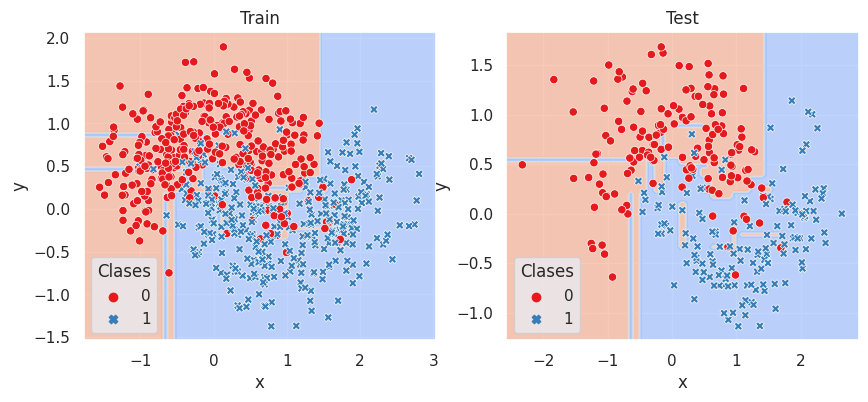

In [ ]:
# Crear la instancia
dt1_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10)
# Entrenar el modelo
dt1_classifier.fit(X_train, y_train)

# Gráfico de la clasificación
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
plot_data(X_train, y_train, dpi=75, model=dt1_classifier, ax=ax1, title='Train')
plot_data(X_test, y_test, dpi=75, model=dt1_classifier, ax=ax2, title='Test')

### Evaluación

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       153
           1       0.85      0.93      0.89       147

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



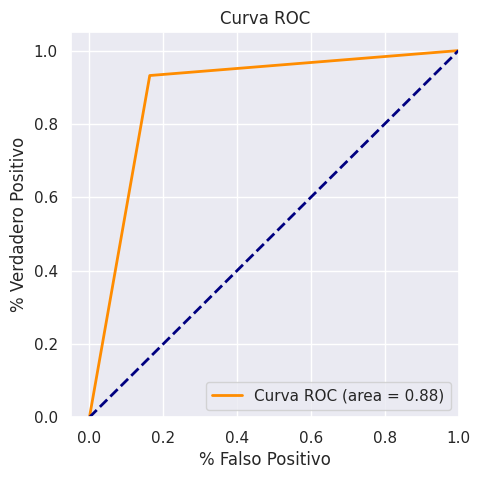

In [ ]:
# Predicción del modelo sobre los datos de prueba
y_pred_dt1_classifier = dt1_classifier.predict(X_test)

# Reporte de métricas de evaluación para clasificación
print(classification_report(y_test, y_pred_dt1_classifier))

# ROC-AUC
auc_roc(y_test, y_pred_dt1_classifier)

### Ejercicio:

Entrene un árbol de decisión con criterio de pérdida de información de Entropía (entropy) la mismas profundidad que se trabajó en el modelo anterior. Evalúe el desempeño de cada modelo ¿Nota algún cambio relevante?

In [ ]:
# ------ ELIMINE ESTA LÍNEA Y ESCRIBA SU CÓDIGO AQUÍ ------

# Calibración de hiperparámetros y ajuste de complejidad del modelo

## Grid Search - K-Fold Cross Validation: KNN

In [20]:
# Definir una malla de hiperparámetros
knn_grid = {'n_neighbors':range(2, 4)}

# Establecer el GS-CV
knn_gs_cv = GridSearchCV(KNeighborsClassifier(),
                         param_grid=knn_grid,
                         cv=7,
                         verbose=1,
                         scoring='recall',
                         return_train_score=True)
knn_gs_cv.fit(X_train, y_train)

Fitting 7 folds for each of 2 candidates, totalling 14 fits


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 4)}, return_train_score=True,
             scoring='recall', verbose=1)

In [21]:
knn_gs_cv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [22]:
knn_gs_cv.best_index_

1

In [23]:
knn_gs_cv.best_params_

{'n_neighbors': 3}

In [24]:
knn_gs_cv.best_score_

0.8672268907563024

In [25]:
knn_gs_cv.cv

7

In [26]:
knn_gs_cv.cv_results_

{'mean_fit_time': array([0.00156229, 0.00170238]),
 'std_fit_time': array([0.0001851 , 0.00052011]),
 'mean_score_time': array([0.01430307, 0.01249988]),
 'std_score_time': array([0.00761923, 0.00739178]),
 'param_n_neighbors': masked_array(data=[2, 3],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2}, {'n_neighbors': 3}],
 'split0_test_score': array([0.68627451, 0.88235294]),
 'split1_test_score': array([0.68627451, 0.82352941]),
 'split2_test_score': array([0.68627451, 0.76470588]),
 'split3_test_score': array([0.74, 0.86]),
 'split4_test_score': array([0.86, 0.94]),
 'split5_test_score': array([0.66, 0.88]),
 'split6_test_score': array([0.82, 0.92]),
 'mean_test_score': array([0.73411765, 0.86722689]),
 'std_test_score': array([0.07133129, 0.05470065]),
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_train_score': array([0.81456954, 0.91059603]),
 'split1_train_score': array([0.82119205, 0.92384106]),
 'sp

In [27]:
knn_gs_cv.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': range(2, 4)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': 'recall',
 'verbose': 1}

In [28]:
knn_gs_cv.multimetric_

False

In [29]:
knn_gs_cv.scoring

'recall'

## Ejercicio:

Encuentre el mejor clasificador SVM usando Grid Search - CV. Escoja 2 valores para el kernel, 3 valores para gamma y 3 valores para C.

In [ ]:
# ------ ELIMINE ESTA LÍNEA Y ESCRIBA SU CÓDIGO AQUÍ ------

## Ejercicio:

Encuentre el mejor clasificador de Árbol de Decisión usando Grid Search - CV. Escoja 2 valores para el criterio de ganancia y pureza de información y 10 valores para la profundidad del árbol.

In [ ]:
# ------ ELIMINE ESTA LÍNEA Y ESCRIBA SU CÓDIGO AQUÍ ------